In [1]:
import pandas as pd
import neo4j as neo
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
import seaborn as sns
from graphdatascience import GraphDataScience
from sklearn.preprocessing import StandardScaler

/Users/derib/Dropbox/Mac (2)/Documents/cours_unige/KOS/seminaire_2022/test_neo4j/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## CONNECTION WITH NEO4J DATABASE

In [2]:
host = "bolt://127.0.0.1:7687"
user = "neo4j"
password= "12345678"


gds = GraphDataScience(host, auth=(user, password))

print(gds.version())

2.26.0


#  Variables to initialise

In [3]:
field_computer_science = ["Information Systems","Computer Software","Data Format",
"Artificial Intelligence and Image Processing","Computation Theory and Mathematics","Other Information and Computing Sciences",
"Library and Information Studies","Computer Hardware"]
field_computer_science

['Information Systems',
 'Computer Software',
 'Data Format',
 'Artificial Intelligence and Image Processing',
 'Computation Theory and Mathematics',
 'Other Information and Computing Sciences',
 'Library and Information Studies',
 'Computer Hardware']

In [4]:
researcher_1="Jean-Henry Morin"
researcher_2="Gilles Falquet"
researcher_list=[researcher_1,researcher_2]

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### METADATA OF THE GRAPH

In [6]:
gds.run_cypher("CALL db.schema.nodeTypeProperties()")

,nodeType,nodeLabels,propertyName,propertyTypes,mandatory
0,:`Field`,[Field],domain,[String],True
1,:`Researcher`,[Researcher],researcher_id,[String],True
2,:`Researcher`,[Researcher],full_name,[String],True
3,:`Researcher`,[Researcher],first_name,"[String, Double]",True
4,:`Researcher`,[Researcher],last_name,[String],True
5,:`Researcher`,[Researcher],total_number_of_publications,[Long],True


In [7]:
#Some metadata
gds.run_cypher("CALL db.schema.relTypeProperties()")

,relType,propertyName,propertyTypes,mandatory
0,:`CO_AUTHORS`,number_of_time,[Long],True
1,:`CO_AUTHORS`,last_year_collaboration,[Long],True
2,:`WORKS_IN`,number_of_publication,[Long],True
3,:`WORKS_IN`,weight_field,[Double],True


### GET THE SCIENTISTS WITH THE MOST PUBLICATIONS IN THE DB

In [8]:
#Get the scientits in unige with the most publications

result_total_publications= gds.run_cypher("MATCH (r:Researcher)-[w:WORKS_IN]-(f:Field) RETURN r.full_name as name, r.researcher_id as researcher_id, r.total_number_of_publications as total, \
collect (f.domain) ORDER BY r.total_number_of_publications DESC LIMIT 80")
result_total_publications.head(20)

,name,researcher_id,total,collect (f.domain)
0,K. Cenzual,ur.014174005714.85,7729,"[Biochemistry and Cell Biology, Physical Chemistry (incl. Structural), Information Systems, Other Physical Sciences, Atomic, Molecular, Nuclear, Particle and Plasma Physics, Paediatrics and Reproductive Medicine, Geology, Astronomical and Space Sciences, Artificial Intelligence and Image Processing, Other Chemical Sciences, Inorganic Chemistry, Materials Engineering, Geochemistry, Condensed Matter Physics, Organic Chemistry, Resources Engineering and Extractive Metallurgy]"
1,X. Wu,ur.01300274247.21,2120,"[Other Physical Sciences, Atomic, Molecular, Nuclear, Particle and Plasma Physics, Applied Economics, Statistics, Astronomical and Space Sciences, Quantum Physics, Artificial Intelligence and Image Processing, Mathematical Physics, Interdisciplinary Engineering, Electrical and Electronic Engineering, Biomedical Engineering, Numerical and Computational Mathematics, Optical Physics, Condensed Matter Physics, Chemical Engineering, Resources Engineering and Extractive Metallurgy]"
2,D. d'Enterria,ur.016312771362.21,1864,"[Other Physical Sciences, Atomic, Molecular, Nuclear, Particle and Plasma Physics, Statistics, Astronomical and Space Sciences, Quantum Physics, Artificial Intelligence and Image Processing, Mathematical Physics, Pure Mathematics, Interdisciplinary Engineering, Materials Engineering, Condensed Matter Physics, Resources Engineering and Extractive Metallurgy]"
3,M. Pierini,ur.014032004363.32,1699,"[Information Systems, Other Physical Sciences, Atomic, Molecular, Nuclear, Particle and Plasma Physics, Statistics, Astronomical and Space Sciences, Quantum Physics, Artificial Intelligence and Image Processing, Mathematical Physics, Pure Mathematics, Interdisciplinary Engineering, Materials Engineering, Biomedical Engineering, Condensed Matter Physics, Chemical Engineering, Resources Engineering and Extractive Metallurgy]"
4,M. Elsing,ur.015440532053.50,1627,"[Other Physical Sciences, Atomic, Molecular, Nuclear, Particle and Plasma Physics, Statistics, Astronomical and Space Sciences, Quantum Physics, Artificial Intelligence and Image Processing, Mathematical Physics, Interdisciplinary Engineering, Electrical and Electronic Engineering, Biomedical Engineering, Optical Physics, Condensed Matter Physics]"
5,L. Malgeri,ur.01201573234.20,1594,"[Other Physical Sciences, Atomic, Molecular, Nuclear, Particle and Plasma Physics, Statistics, Astronomical and Space Sciences, Quantum Physics, Artificial Intelligence and Image Processing, Mathematical Physics, Pure Mathematics, Interdisciplinary Engineering, Materials Engineering, Optical Physics, Condensed Matter Physics, Resources Engineering and Extractive Metallurgy]"
6,T. Wengler,ur.010765257600.38,1377,"[Physical Chemistry (incl. Structural), Other Physical Sciences, Atomic, Molecular, Nuclear, Particle and Plasma Physics, Statistics, Astronomical and Space Sciences, Quantum Physics, Artificial Intelligence and Image Processing, Mathematical Physics, Interdisciplinary Engineering, Materials Engineering, Biomedical Engineering, Applied Mathematics, Optical Physics, Chemical Engineering, Manufacturing Engineering]"
7,M. Lassnig,ur.013744472523.62,1367,"[Information Systems, Other Physical Sciences, Atomic, Molecular, Nuclear, Particle and Plasma Physics, Statistics, Astronomical and Space Sciences, Quantum Physics, Artificial Intelligence and Image Processing, Mathematical Physics, Interdisciplinary Engineering, Computer Software, Electrical and Electronic Engineering, Sociology, Optical Physics, Condensed Matter Physics, Computation Theory and Mathematics]"
8,A. Pfeiffer,ur.011256127372.09,1334,"[Information Systems, Other Physical Sciences, Atomic, Molecular, Nuclear, Particle and Plasma Physics, Statistics, Astronomical and Space Sciences, Quantum Physics, Artificial Intelligence and Image Processing, Mathematical Physics, Pure Mathematics, Interdisciplinary Engineering, Computer Software, Mate

In [9]:
result_total_publications_map = gds.run_cypher("MATCH (r:Researcher)-[w:WORKS_IN]-(f:Field) RETURN r.full_name, \
r.total_number_of_publications as total, collect({number:w.number_of_publication,field:f.domain}) as field_number ORDER BY total DESC LIMIT 10")
result_total_publications_map.head()

,r.full_name,total,field_number
0,K. Cenzual,7729,"[{'number': 66, 'field': 'Biochemistry and Cell Biology'}, {'number': 950, 'field': 'Physical Chemistry (incl. Structural)'}, {'number': 67, 'field': 'Information Systems'}, {'number': 1, 'field': 'Other Physical Sciences'}, {'number': 2495, 'field': 'Atomic, Molecular, Nuclear, Particle and Plasma Physics'}, {'number': 1, 'field': 'Paediatrics and Reproductive Medicine'}, {'number': 236, 'field': 'Geology'}, {'number': 393, 'field': 'Astronomical and Space Sciences'}, {'number': 1, 'field': 'Artificial Intelligence and Image Processing'}, {'number': 1, 'field': 'Other Chemical Sciences'}, {'number': 3432, 'field': 'Inorganic Chemistry'}, {'number': 70, 'field': 'Materials Engineering'}, {'number': 3, 'field': 'Geochemistry'}, {'number': 6, 'field': 'Condensed Matter Physics'}, {'number': 1, 'field': 'Organic Chemistry'}, {'number': 6, 'field': 'Resources Engineering and Extractive Metallurgy'}]"
1,X. Wu,2120,"[{'number': 480, 'field': 'Other Physical Sciences'}, {'number': 814, 'field': 'Atomic, Molecular, Nuclear, Particle and Plasma Physics'}, {'number': 1, 'field': 'Applied Economics'}, {'number': 35, 'field': 'Statistics'}, {'number': 172, 'field': 'Astronomical and Space Sciences'}, {'number': 252, 'field': 'Quantum Physics'}, {'number': 1, 'field': 'Artificial Intelligence and Image Processing'}, {'number': 50, 'field': 'Mathematical Physics'}, {'number': 5, 'field': 'Interdisciplinary Engineering'}, {'number': 4, 'field': 'Electrical and Electronic Engineering'}, {'number': 1, 'field': 'Biomedical Engineering'}, {'number': 1, 'field': 'Numerical and Computational Mathematics'}, {'number': 1, 'field': 'Optical Physics'}, {'number': 4, 'field': 'Condensed Matter Physics'}, {'number': 1, 'field': 'Chemical Engineering'}, {'number': 2, 'field': 'Resources Engineering and Extractive Metallurgy'}]"
2,D. d'Enterria,1864,"[{'number': 142, 'field': 'Other Physical Sciences'}, {'number': 934, 'field': 'Atomic, Molecular, Nuclear, Particle and Plasma Physics'}, {'number': 52, 'field': 'Statistics'}, {'number': 125, 'field': 'Astronomical and Space Sciences'}, {'number': 271, 'field': 'Quantum Physics'}, {'number': 1, 'field': 'Artificial Intelligence and Image Processing'}, {'number': 199, 'field': 'Mathematical Physics'}, {'number': 5, 'field': 'Pure Mathematics'}, {'number': 2, 'field': 'Interdisciplinary Engineering'}, {'number': 3, 'field': 'Materials Engineering'}, {'number': 1, 'field': 'Condensed Matter Physics'}, {'number': 1, 'field': 'Resources Engineering and Extractive Metallurgy'}]"
3,M. Pierini,1699,"[{'number': 1, 'field': 'Information Systems'}, {'number': 113, 'field': 'Other Physical Sciences'}, {'number': 832, 'field': 'Atomic, Molecular, Nuclear, Particle and Plasma Physics'}, {'number': 51, 'field': 'Statistics'}, {'number': 112, 'field': 'Astronomical and Space Sciences'}, {'number': 258, 'field': 'Quantum Physics'}, {'number': 13, 'field': 'Artificial Intelligence and Image Processing'}, {'number': 177, 'field': 'Mathematical Physics'}, {'number': 5, 'field': 'Pure Mathematics'}, {'number': 2, 'field': 'Interdisciplinary Engineering'}, {'number': 3, 'field': 'Materials Engineering'}, {'number': 1, 'field': 'Biomedical Engineering'}, {'number': 4, 'field': 'Condensed Matter Physics'}, {'number': 1, 'field': 'Chemical Engineering'}, {'number': 1, 'field': 'Resources Engineering and Extractive Metallurgy'}]"
4,M. Elsing,1627,"[{'number': 506, 'field': 'Other Physical Sciences'}, {'number': 650, 'field': 'Atomic, Molecular, Nuclear, Particle and Plasma Physics'}, {'number': 22, 'field': 'Statistics'}, {'number': 102, 'field': 'Astronomical and Space Sciences'}, {'number': 177, 'field': 'Quantum Physics'}, {'number': 1, 'field': 'Artificial Intelligence and Image Processing'}, {'number': 115, 'field': 'Mathematical Physics'}, {'number': 1, 'field': 'Interdisciplinary Engineering'}, {'number': 1, 'field': 'Electrical and Electronic Engineering'}, {'number': 3, 'f

/var/folders/wc/4r8t_c91523cgt8st98mw_ph0000gn/T/ipykernel_7356/2333213598.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g = g.set_xticklabels(g.get_xticklabels(), rotation=90)


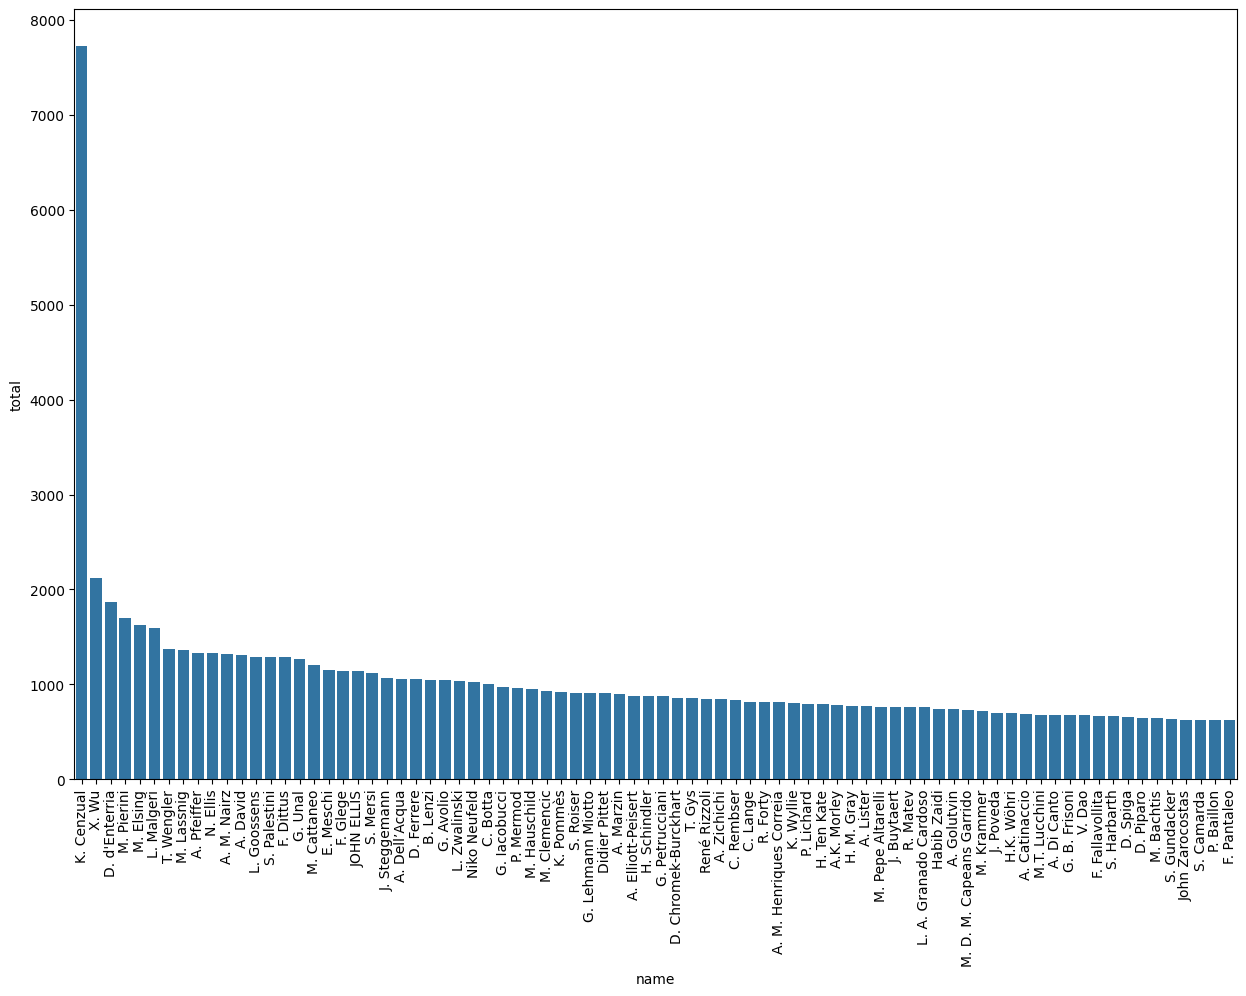

In [10]:
g = sns.barplot(x=result_total_publications["name"], y=result_total_publications["total"])
g = g.set_xticklabels(g.get_xticklabels(), rotation=90)

## WHO IS K.CENZUAL????
When the data is weird like this, normally you investigate.

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [12]:
CENZUAL = gds.run_cypher("MATCH (n:Researcher{researcher_id:'ur.014174005714.85'})-[:WORKS_IN]-(f:Field) return n.full_name, n.last_name, n.total_number_of_publications, collect(f.domain)")
CENZUAL

,n.full_name,n.last_name,n.total_number_of_publications,collect(f.domain)
0,K. Cenzual,Cenzual,7729,"[Artificial Intelligence and Image Processing, Geology, Physical Chemistry (incl. Structural), Information Systems, Other Chemical Sciences, Atomic, Molecular, Nuclear, Particle and Plasma Physics, Other Physical Sciences, Materials Engineering, Condensed Matter Physics, Biochemistry and Cell Biology, Inorganic Chemistry, Geochemistry, Astronomical and Space Sciences, Resources Engineering and Extractive Metallurgy, Organic Chemistry, Paediatrics and Reproductive Medicine]"


### Number of publication in an domain of research

In [13]:
#Get the field which has the most publications
result_domain_count = gds.run_cypher("MATCH (r:Researcher)-[w:WORKS_IN]-(f:Field) RETURN f.domain as domain, count(*) as number_time ORDER BY  number_time DESC LIMIT 40")
result_domain_count.head()

,domain,number_time
0,Clinical Sciences,15891
1,Public Health and Health Services,13093
2,"Atomic, Molecular, Nuclear, Particle and Plasma Physics",11692
3,Other Physical Sciences,11401
4,Biochemistry and Cell Biology,6294


/var/folders/wc/4r8t_c91523cgt8st98mw_ph0000gn/T/ipykernel_7356/2481717666.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g =g.set_xticklabels(g.get_xticklabels(), rotation=90)


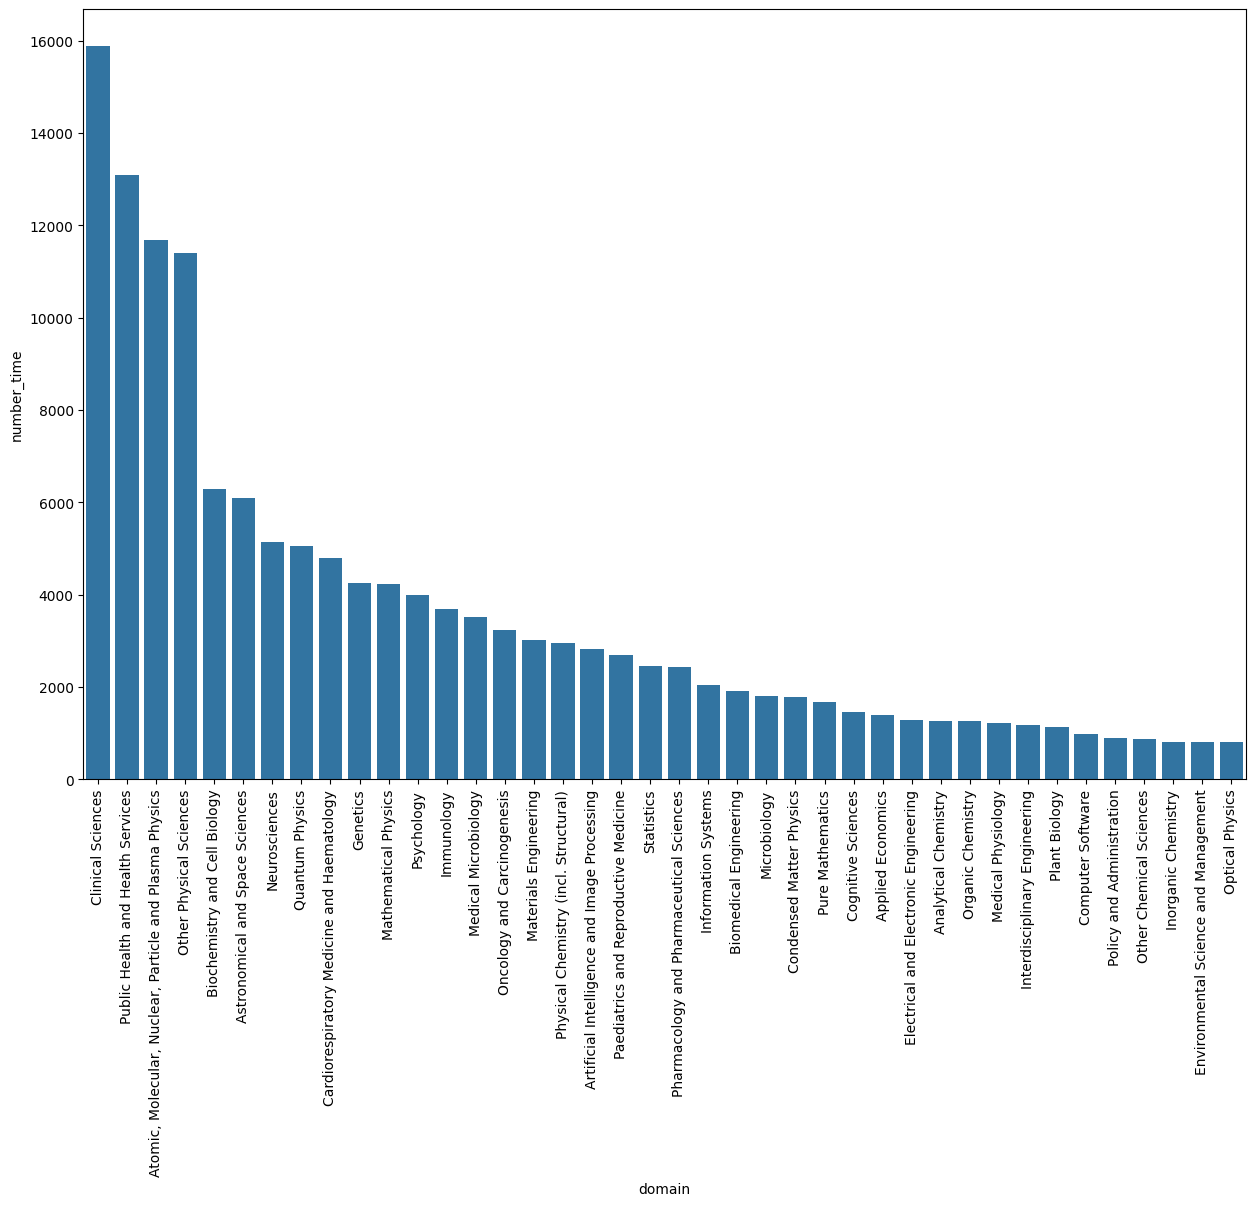

In [14]:
g = sns.barplot(x=result_domain_count["domain"], y=result_domain_count["number_time"])
g =g.set_xticklabels(g.get_xticklabels(), rotation=90)

### Who published in the most area of research

In [15]:
#Get the researcher that works in several research fields.
result_field = gds.run_cypher("MATCH (r:Researcher)-[w:WORKS_IN]-(f:Field) RETURN r.full_name as name, r.researcher_id as researcher_id, count(*) as fields ORDER BY  fields DESC LIMIT 30")
result_field.head(10)

,name,researcher_id,fields
0,BASTIEN CHOPARD,ur.016275067565.80,46
1,S Rudaz,ur.0605706427.85,37
2,A. Zichichi,ur.012521521573.71,36
3,Jean-Charles Sanchez,ur.01326260071.22,32
4,Bernice S. Elger,ur.01306617426.43,31
5,François R. Herrmann,ur.01206175026.02,31
6,Vera I. Slaveykova,ur.01304222144.30,30
7,Martin K. Patel,ur.01205731332.31,30
8,Jean-Luc Wolfender,ur.01001572401.77,29
9,T. Pun,ur.01212142027.87,28


/var/folders/wc/4r8t_c91523cgt8st98mw_ph0000gn/T/ipykernel_7356/950732247.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g = g.set_xticklabels(g.get_xticklabels(), rotation=90)


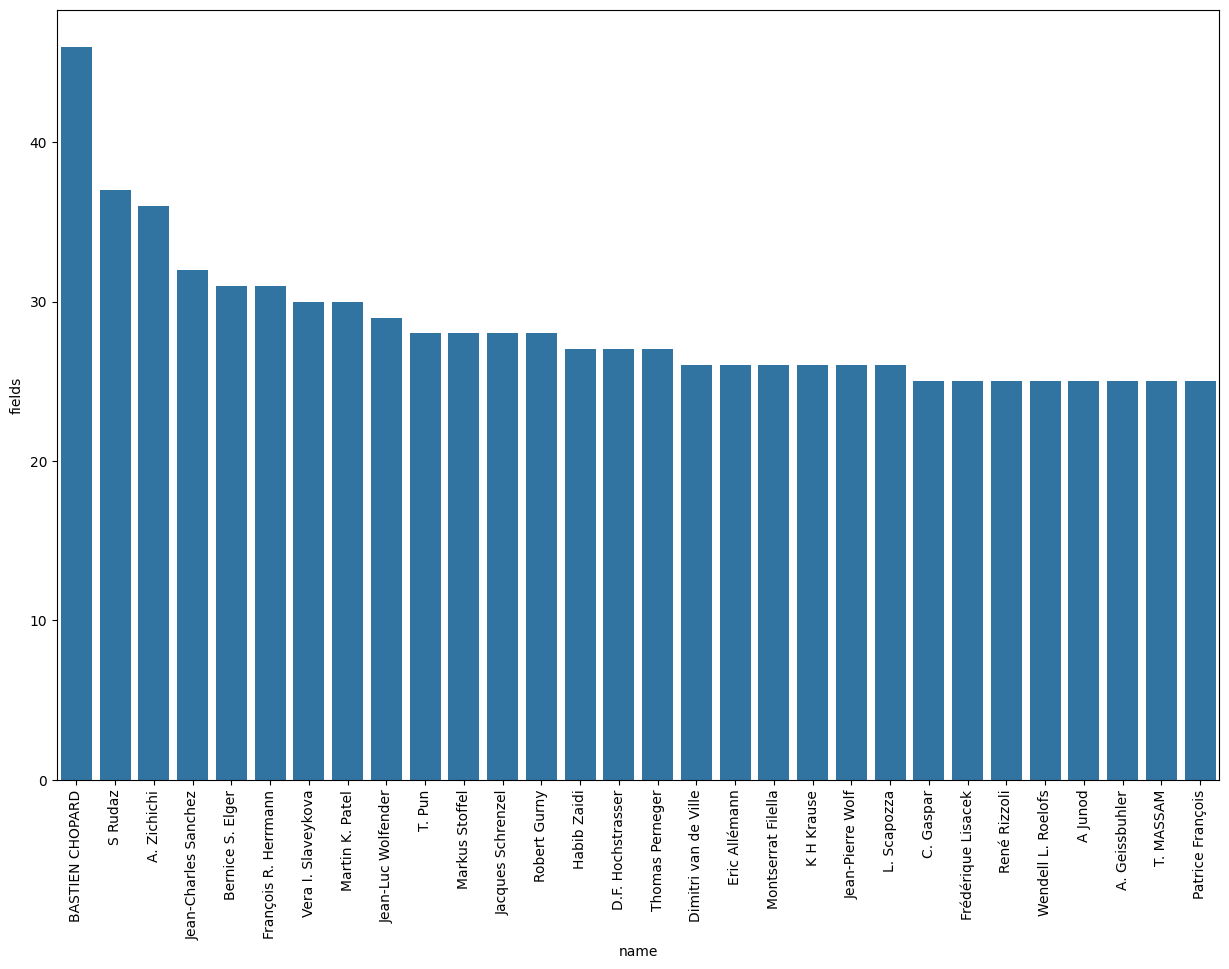

In [16]:
g = sns.barplot(x=result_field["name"], y=result_field["fields"])
g = g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [17]:
choppard = gds.run_cypher("MATCH (r:Researcher{researcher_id:'ur.016275067565.80'})-[w:WORKS_IN]-(f:Field) RETURN r.full_name as full_name, count(*) as total_fields, collect(f.domain) as domain")

print(choppard.domain)

0    [Information Systems, Physical Geography and Environmental Geoscience, Computation Theory and Mathematics, Genetics, Distributed Computing, Pure Mathematics, Communications Technologies, Chemical Engineering, Mechanical Engineering, Computer Software, Cognitive Sciences, Data Format, Clinical Sciences, Optical Physics, Artificial Intelligence and Image Processing, Geophysics, Mathematical Physics, Banking, Finance and Investment, Applied Economics, Neurosciences, Econometrics, Geomatic Engineering, Numerical and Computational Mathematics, Zoology, Statistics, Civil Engineering, Medical Physiology, Biomedical Engineering, Physiology, Applied Mathematics, Theoretical and Computational Chemistry, Inorganic Chemistry, Environmental Engineering, Maritime Engineering, Physical Chemistry (incl. Structural), Biochemistry and Cell Biology, Geology, Human Movement and Sports Science, Atmospheric Sciences, Psychology, Other Chemical Sciences, Cardiorespiratory Medicine and Haematology, Quant

## Computer science

## Scientists with the most publications in Computer Science (areas)

In [18]:
#Get the researcher with the most publications in Computer Science 

query_number_publications_in_computer_science_person =f"MATCH(r:Researcher)-[w:WORKS_IN]-(f:Field) WHERE f.domain IN {field_computer_science} \
    and w.weight_field > 1 return distinct r.full_name as name,r.researcher_id as researcher_id, r.total_number_of_publications as total_publication ORDER by r.total_number_of_publications DESC"

result_number_publication_person_computer_science = gds.run_cypher(query_number_publications_in_computer_science_person)
result_number_publication_person_computer_science.head(20)

,name,researcher_id,total_publication
0,Habib Zaidi,ur.01300453230.34,741
1,Nadia Magnenat-Thalmann,ur.0704711431.38,533
2,Dimitri van de Ville,ur.01041204034.82,418
3,BASTIEN CHOPARD,ur.016275067565.80,339
4,Amos Bairoch,ur.01076543625.00,233
5,Osman Ratib,ur.0617321230.19,230
6,Henning Müller,ur.07552063233.67,218
7,T. Pun,ur.01212142027.87,212
8,Christian Lovis,ur.01133331655.52,196
9,Frédérique Lisacek,ur.0674012177.79,195


In [19]:
query_informatique_fields = (f"MATCH(n:Researcher)-[w:WORKS_IN]-(f:Field) WHERE f.domain \
     IN {field_computer_science}  RETURN DISTINCT n.full_name, n.researcher_id as researcher, f.domain, w.weight_field ORDER by w.weight_field DESC")

result_informatique_field = gds.run_cypher(query_informatique_fields)
result_informatique_field.head(10)

,n.full_name,researcher,f.domain,w.weight_field
0,Henning Müller,ur.07552063233.67,Artificial Intelligence and Image Processing,11.605505
1,Nadia Magnenat-Thalmann,ur.0704711431.38,Artificial Intelligence and Image Processing,11.227017
2,T. Pun,ur.01212142027.87,Artificial Intelligence and Image Processing,10.566038
3,Nadia Magnenat Thalmann,ur.013317560667.45,Artificial Intelligence and Image Processing,7.442748
4,Stéphane Marchand-Maillet,ur.016472056171.12,Artificial Intelligence and Image Processing,7.264368
5,Michel Leonard,ur.01066422007.20,Information Systems,7.183673
6,Habib Zaidi,ur.01300453230.34,Artificial Intelligence and Image Processing,6.558704
7,P. Volino,ur.07527316741.46,Artificial Intelligence and Image Processing,6.176471
8,M. Hilario,ur.010323216605.25,Artificial Intelligence and Image Processing,6.139535
9,Patrick Ruch,ur.016176475704.89,Artificial Intelligence and Image Processing,6.055046


In [20]:
#Get the researcher that works in several research fields.
result_field = gds.run_cypher(f"MATCH (r:Researcher)-[w:WORKS_IN]-(f:Field) WHERE f.domain \
IN {field_computer_science} and w.weight_field > 5 with r,f,w MATCH (r)-[ww:WORKS_IN]-(ff:Field)  \
RETURN r.full_name,r.researcher_id as researcher_id, r.total_number_of_publications as total_publication,max(w.weight_field) as max_weight_field, \
collect( DISTINCT f.domain) as domain_computer, \
count(ff.domain) as count_all_domain, collect(ff.domain) as all_domain  \
ORDER BY total_publication DESC ")
result_field.head(20)

,r.full_name,researcher_id,total_publication,max_weight_field,domain_computer,count_all_domain,all_domain
0,Habib Zaidi,ur.01300453230.34,741,6.558704,[Artificial Intelligence and Image Processing],27,"[Physiology, Astronomical and Space Sciences, Artificial Intelligence and Image Processing, Pharmacology and Pharmaceutical Sciences, Optical Physics, Biochemistry and Cell Biology, Materials Engineering, Theoretical and Computational Chemistry, Statistics, Other Physical Sciences, Information Systems, Paediatrics and Reproductive Medicine, Public Health and Health Services, Atomic, Molecular, Nuclear, Particle and Plasma Physics, Electrical and Electronic Engineering, Oncology and Carcinogenesis, Numerical and Computational Mathematics, Medical Physiology, Clinical Sciences, Cardiorespiratory Medicine and Haematology, Human Movement and Sports Science, Psychology, Biomedical Engineering, Computation Theory and Mathematics, Neurosciences, Cognitive Sciences, Computer Software]"
1,Nadia Magnenat-Thalmann,ur.0704711431.38,533,11.227017,[Artificial Intelligence and Image Processing],22,"[Human Movement and Sports Science, Curriculum and Pedagogy, Computation Theory and Mathematics, Statistics, Information Systems, Materials Engineering, Specialist Studies In Education, Psychology, Biomedical Engineering, Computer Software, Neurosciences, Cognitive Sciences, Manufacturing Engineering, Architecture, Clinical Sciences, Electrical and Electronic Engineering, Numerical and Computational Mathematics, Cultural Studies, Curatorial and Related Studies, Mechanical Engineering, Artificial Intelligence and Image Processing, Design Practice and Management]"
2,Henning Müller,ur.07552063233.67,218,11.605505,[Artificial Intelligence and Image Processing],23,"[Psychology, Computation Theory and Mathematics, Cardiorespiratory Medicine and Haematology, Linguistics, Human Movement and Sports Science, Medical Biotechnology, Statistics, Data Format, Neurosciences, Analytical Chemistry, Cognitive Sciences, Clinical Sciences, Information Systems, Public Health and Health Services, Other Biological Sciences, Biomedical Engineering, Biochemistry and Cell Biology, Artificial Intelligence and Image Processing, Distributed Computing, Electrical and Electronic Engineering, Computer Software, Communications Technologies, Oncology and Carcinogenesis]"
3,T. Pun,ur.01212142027.87,212,10.566038,[Artificial Intelligence and Image Processing],28,"[Pure Mathematics, Civil Engineering, Artificial Intelligence and Image Processing, Cultural Studies, Information Systems, Computer Software, Biomedical Engineering, Psychology, Communications Technologies, Computation Theory and Mathematics, Cardiorespiratory Medicine and Haematology, Environmental Science and Management, Statistics, Other Physical Sciences, Medical Biotechnology, Applied Economics, Electrical and Electronic Engineering, Design Practice and Management, Cognitive Sciences, Clinical Sciences, Other Biological Sciences, Film, Television and Digital Media, Dentistry, Data Format, Neurosciences, Distributed Computing, Optical Physics, Medical Biochemistry and Metabolomics]"
4,Stéphane Marchand-Maillet,ur.016472056171.12,174,7.264368,"[Artificial Intelligence and Image Processing, Information Systems]",32,"[Computer Software, Archaeology, Architecture, Data Format, Econometrics, Psychology, Information Systems, Pure Mathematics, Ecology, Artificial Intelligence and Image Processing, Public Health and Health Services, Electrical and Electronic Engineering, Geomatic Engineering, Statistics, Environmental Science and Management, Computation Theory and Mathematics, Computer Software, Archaeology, Architecture, Data Format, Econometrics, Psychology, Information Systems, Pure Mathematics, Ecology, Artificial Intelligence and Image Processing, Public Health and Health Services, Electrical and Electronic Engineering, Geomatic Engineering, Statistics, Environmental Science and Management, Computation Theory and Mathematics

## Start of the Recommender 

## Start for the graph algorithms to skip if these relationships are already in the DB

In [21]:
graph_name = "co_authors_graph"

In [22]:
result = gds.run_cypher("""CALL gds.graph.drop($params,false) YIELD graphName""",params={"params":graph_name}) # drop the graph and do not raise the error if the graph is not found.
result = gds.run_cypher("""CALL gds.graph.project($params, 'Researcher', 'CO_AUTHORS')""",params={"params":graph_name})
result

,nodeProjection,relationshipProjection,graphName,nodeCount,relationshipCount,projectMillis
0,"{'Researcher': {'properties': {}, 'label': 'Researcher'}}","{'CO_AUTHORS': {'orientation': 'NATURAL', 'aggregation': 'DEFAULT', 'type': 'CO_AUTHORS', 'properties': {}, 'indexInverse': False}}",co_authors_graph,64849,697374,910


## Centrality
Utiliser les algorithmes de centralités pour calculer les chercheurs qui ont plus de connection (plus important) que d'autres. Ceci pourrait être utiliser plus tard pour classifier les reviewers.

### Calculate the Degree Centrality

In [23]:
#Stream the result for the degree centrality 

result = gds.run_cypher(
f" CALL gds.degree.stream($params) YIELD nodeId, score RETURN gds.util.asNode(nodeId).full_name AS name, score ORDER BY score DESC, name ASC", params={"params":graph_name}
)
result.head()

,name,score
0,G. Avolio,1438.0
1,M. Elsing,1302.0
2,F. Dittus,1247.0
3,L.S. Ancu,1240.0
4,N. Ellis,1214.0


In [24]:
#write the data in the graph
result = gds.run_cypher(f"CALL gds.degree.write($params_graph, {{writeProperty: 'degree_centrality'}})",params={"params_graph":graph_name})
result


,nodePropertiesWritten,preProcessingMillis,computeMillis,postProcessingMillis,writeMillis,centralityDistribution,configuration
0,64849,0,0,67,437,"{'p99': 152.00096893310547, 'min': 0.0, 'max': 1438.0078124999998, 'mean': 10.75384266716316, 'p90': 19.00011444091797, 'p50': 3.0000076293945312, 'p999': 558.0038986206055, 'p95': 40.00023651123047, 'p75': 8.000053405761719}","{'jobId': 'jid-28416573-230e-4586-a3a8-addc34366a03', 'orientation': 'NATURAL', 'writeConcurrency': 4, 'writeProperty': 'degree_centrality', 'logProgress': True, 'nodeLabels': ['*'], 'sudo': False, 'relationshipTypes': ['*'], 'writeToResultStore': False, 'concurrency': 4}"


### Difference between centrality and betweeeness measures

Degree centrality measures the number of incoming or outgoing (or both) relationships from a node, depending on the orientation of a relationship projection.

Betweenness centrality is a way of detecting the amount of influence a node has over the flow of information in a graph. It is often used to find nodes that serve as a bridge from one part of a graph to another.

In [47]:
# #difficult to run on AURO DS
result_betweeness = gds.run_cypher(
f" CALL gds.betweenness.write($params_graph, {{writeProperty: 'betweeness'}})",params={"params_graph":graph_name})
result_betweeness


,nodePropertiesWritten,preProcessingMillis,computeMillis,postProcessingMillis,writeMillis,centralityDistribution,configuration
0,64849,0,125780,462,87,"{'p99': 2583663.99999997, 'min': 0.0, 'max': 160066559.99999997, 'mean': 136973.34084905818, 'p90': 144216.9999999702, 'p50': 0.0, 'p999': 14389695.99999997, 'p95': 428221.9999999702, 'p75': 5165.624999970198}","{'jobId': 'jid-1b3b2714-23af-4ac5-97aa-6233bd331417', 'writeConcurrency': 4, 'writeProperty': 'betweeness', 'logProgress': True, 'nodeLabels': ['*'], 'sudo': False, 'relationshipTypes': ['*'], 'writeToResultStore': False, 'concurrency': 4}"


### Calculate PageRank
The PageRank algorithm measures the importance of each node within the graph, based on the number 
incoming relationships and the importance of the corresponding source nodes. 
The underlying assumption roughly speaking is that a page is only as important as the pages that link to it.


In [26]:
result_page_rank_stream = gds.run_cypher(
f" CALL gds.pageRank.stream($params)\
YIELD nodeId, score \
RETURN gds.util.asNode(nodeId).full_name AS name, score \
ORDER BY score DESC, name ASC" , params={"params":graph_name}
)
result_page_rank_stream.head(10)

,name,score
0,[Authorinst]The CMS Collaboration,66.912424
1,L. Zwalinski,52.810444
2,X. Wu,47.408888
3,T. Wengler,34.155657
4,Stylianos E. Antonarakis,31.788445
5,F. Zimmermann,30.998080
6,K. Wyllie,30.297554
7,Stefan Matile,29.434901
8,T. Virdee,29.379169
9,P. Morel,29.030797


In [27]:
result_page_rank_write = gds.run_cypher(
f" CALL gds.pageRank.write($params_graph, {{writeProperty: 'pageRank',scaler:'L1NORM'}})",params={"params_graph":graph_name})
result_page_rank_write

,ranIterations,didConverge,centralityDistribution,preProcessingMillis,computeMillis,postProcessingMillis,writeMillis,nodePropertiesWritten,configuration
0,20,False,"{'p99': 0.0001391796104144305, 'min': 4.246103344485164e-06, 'max': 0.00189412385225296, 'mean': 1.542043051883027e-05, 'p90': 2.9489485314115882e-05, 'p50': 7.253780495375395e-06, 'p999': 0.00041236539254896343, 'p95': 4.866320523433387e-05, 'p75': 1.410508411936462e-05}",0,207,19,153,64849,"{'maxIterations': 20, 'writeConcurrency': 4, 'concurrency': 4, 'jobId': 'jid-7b21b27b-cc44-4af5-b9c1-fa4ca0bf991e', 'sourceNodes': [], 'writeProperty': 'pageRank', 'scaler': 'L1NORM', 'logProgress': True, 'nodeLabels': ['*'], 'sudo': False, 'dampingFactor': 0.85, 'relationshipTypes': ['*'], 'writeToResultStore': False, 'tolerance': 1e-07}"


## Query the database for pageRank and Degree centrality

In [28]:
betweeness_page_rank_df = gds.run_cypher(f"MATCH (n:Researcher)-[w:WORKS_IN]-(f:Field) WHERE f.domain IN {field_computer_science} and \
    w.weight_field>1 return DISTINCT n.full_name, n.researcher_id, n.pageRank as pageRank,n.degree_centrality as centrality_score ORDER by pageRank DESC")
betweeness_page_rank_df

#centrality_df = gds.run_cypher(f"MATCH (n:Researcher)-[w:WORKS_IN]-(f:Field) WHERE f.domain IN {field_computer_science} and w.weight_field>3 return DISTINCT n.full_name,  n.researcher_id, n.degree_centrality as centrality_score ORDER by centrality_score  DESC")

,n.full_name,n.researcher_id,pageRank,centrality_score
0,Dimitri van de Ville,ur.01041204034.82,0.000401,58.0
1,Osman Ratib,ur.0617321230.19,0.000398,72.0
2,A. Geissbuhler,ur.0600360343.20,0.000396,41.0
3,Christian Lovis,ur.01133331655.52,0.000338,51.0
4,Cathy Wu,ur.010260073507.82,0.000308,54.0
...,...,...,...,...
841,Christoforos Raptopoulos,ur.011610650375.76,0.000004,0.0
842,Mihai Lica Pura,ur.011337474245.30,0.000004,1.0
843,Shalom Eliahou,ur.011231372723.87,0.000004,2.0
844,Fakhar Abbas,ur.010120421253.74,0.000004,0.0


In [29]:
# scaler = StandardScaler()
# betweeness_page_rank_df.iloc[:,2:] = scaler.fit_transform(betweeness_page_rank_df.iloc[:,2:].to_numpy())
# betweeness_page_rank_df

In [30]:
#betweeness_page_rank_df.iloc[:,2:]= betweeness_page_rank_df.iloc[:,2:].transform(lambda x: x / abs(x).max())

In [31]:
betweeness_page_rank_df.fillna(0,inplace=True)
betweeness_page_rank_df_graph = betweeness_page_rank_df.set_index("n.full_name")

In [32]:
betweeness_page_rank_df_graph.sort_values(by="centrality_score",ascending=False,inplace=True)

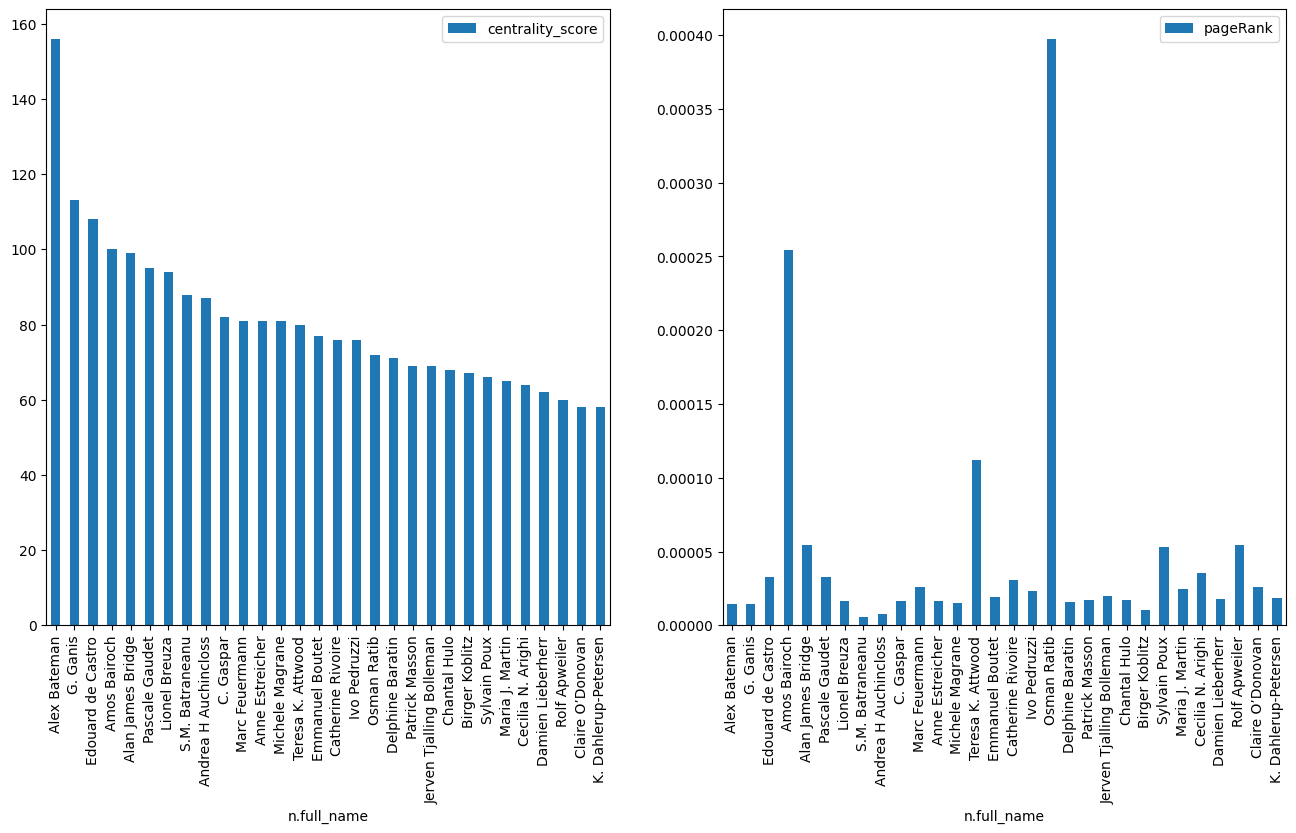

In [33]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,8))
betweeness_page_rank_df_graph[["centrality_score"]].head(30).plot(kind="bar", ax=ax1)
betweeness_page_rank_df_graph[["pageRank"]].head(30).plot(kind="bar",ax=ax2)
a = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

The Degree Centrality algorithm counts the number of incoming and outgoing relationships from a node. It is used to find popular nodes in a graph.

PageRank is a variant of the Eigenvector Centrality algorithm which measures the transitive (or directional) influence of nodes. Relationships to high-scoring nodes contribute more to the score of a node than connections to low-scoring nodes. A high score means that a node is connected to other nodes that have high scores.

On peut remarquer que les mesures ne donnent pas les mêmes résultats. La question est de savoir quel algorithmes choisir, et cela se fait en fonction de ce que l'on veut faire, et des hypotheses de départ.
Par exemple, si on recherche un scientifique qui est un hub on va choisir Betweenness Centrality comme algorithme.
Entre ces deux exemples, PageRank et centrality, on voit que certains scientifiques on un score PageRank plus haut que leur score de centrality, ou plus bas. Cela pourrait être du au fait que les personnes avec qui ces scientifiques collaborent sont des personnes qui sont "importante" ou peu "importante". Un·e scientifique qui collabore surtout avec des étudiants en Doctorat va avoir un PageRank score plus bas que quelqu'un qui collabore surtout avec des scientifiques de renoms.

In [34]:
betweeness_page_rank_df_graph[betweeness_page_rank_df_graph.index.str.startswith("Jean-Henry")]


,n.researcher_id,pageRank,centrality_score
n.full_name,,,
Jean-Henry Morin,ur.0631021307.20,0.000029,2.0


In [35]:
betweeness_page_rank_df_graph[betweeness_page_rank_df_graph.index.str.startswith("Hélène")]

,n.researcher_id,pageRank,centrality_score
n.full_name,,,
Hélène de Ribaupierre,ur.01276566337.02,0.000004,1.0


In [36]:
betweeness_page_rank_df_graph[betweeness_page_rank_df_graph.index.str.startswith("Nadia Magnenat-Thalmann")]

,n.researcher_id,pageRank,centrality_score
n.full_name,,,
Nadia Magnenat-Thalmann,ur.0704711431.38,0.000215,23.0


## COMMUNITY

The Label Propagation algorithm (LPA) is a fast algorithm for finding communities in a graph. It detects these communities using network structure alone as its guide, and doesn’t require a pre-defined objective function or prior information about the communities.
LPA works by propagating labels throughout the network and forming communities based on this process of label propagation.
The intuition behind the algorithm is that a single label can quickly become dominant in a densely connected group of nodes, but will have trouble crossing a sparsely connected region. Labels will get trapped inside a densely connected group of nodes, and those nodes that end up with the same label when the algorithms finish can be considered part of the same community.

The Louvain method is an algorithm to detect communities in large networks. It maximizes a modularity score for each community, where the modularity quantifies the quality of an assignment of nodes to communities. This means evaluating how much more densely connected the nodes within a community are, compared to how connected they would be in a random network. (source neo4j)

In [37]:
graph_name_2 = "co_authors_graph_weight"
result = gds.run_cypher("""CALL gds.graph.drop($params,false) YIELD graphName""",params={"params":graph_name_2}) # drop the graph and do not raise the error if the graph is not found.
result = gds.run_cypher("""CALL gds.graph.project('co_authors_graph_weight', 'Researcher', {CO_AUTHORS:{properties:"number_of_time"}})""",params={"params":graph_name_2})
result

,nodeProjection,relationshipProjection,graphName,nodeCount,relationshipCount,projectMillis
0,"{'Researcher': {'properties': {}, 'label': 'Researcher'}}","{'CO_AUTHORS': {'orientation': 'NATURAL', 'aggregation': 'DEFAULT', 'type': 'CO_AUTHORS', 'properties': {'number_of_time': {'property': 'number_of_time', 'defaultValue': None, 'aggregation': 'DEFAULT'}}, 'indexInverse': False}}",co_authors_graph_weight,64849,697374,263


In [38]:
#LabelPropation with weight
gds.run_cypher("""CALL gds.labelPropagation.stats($graph_name,{maxIterations:22})
YIELD communityCount, ranIterations, didConverge""",params={"graph_name":graph_name_2})

,communityCount,ranIterations,didConverge
0,13277,22,False


In [39]:
#labelPropagation without weight
gds.run_cypher("""CALL gds.labelPropagation.stats($graph_name,{maxIterations:22})
YIELD communityCount, ranIterations, didConverge""",params={"graph_name":graph_name})


,communityCount,ranIterations,didConverge
0,13276,22,False


In [40]:
gds.run_cypher("""CALL gds.labelPropagation.stream($graph_name,{relationshipWeightProperty:"number_of_time",maxIterations:20})
YIELD nodeId, communityId AS Community
RETURN gds.util.asNode(nodeId).full_name AS Name, Community
ORDER BY Community, Name""",params={"graph_name":graph_name_2})

,Name,Community
0,Carl Bader,12
1,Georg Arx,19
2,Dragana Djurdjevic,30
3,C. Smith,37
4,D. H. Dunham,37
...,...,...
64844,G.D. Appiah,64844
64845,J.M. Kipela,64844
64846,M. Cole,64845
64847,Mathieu Grobéty,64846


In [41]:
#Louvain with weight
gds.run_cypher("""
CALL gds.louvain.stats($graph_name,{relationshipWeightProperty:"number_of_time",maxIterations:22})
YIELD communityCount""",params={"graph_name":graph_name_2})

,communityCount
0,10502


In [42]:
#Louvain without weight
gds.run_cypher("""
CALL gds.louvain.stats($graph_name)
YIELD communityCount""",params={"graph_name":graph_name_2})

,communityCount
0,9915


In [43]:
# Label propagation
gds.run_cypher("""CALL gds.labelPropagation.stream($graph_name,{relationshipWeightProperty:"number_of_time",maxIterations:20})
YIELD nodeId, communityId AS Community
RETURN gds.util.asNode(nodeId).full_name AS Name, Community
ORDER BY Community, Name""",params={"graph_name":graph_name_2})

,Name,Community
0,Carl Bader,12
1,Georg Arx,19
2,Dragana Djurdjevic,30
3,C. Smith,37
4,D. H. Dunham,37
...,...,...
64844,G.D. Appiah,64844
64845,J.M. Kipela,64844
64846,M. Cole,64845
64847,Mathieu Grobéty,64846


In [44]:
#LOUVAIN

gds.run_cypher("""
CALL gds.louvain.stream($graph_name)
YIELD nodeId, communityId, intermediateCommunityIds
RETURN gds.util.asNode(nodeId).full_name AS full_name, communityId, intermediateCommunityIds
ORDER BY full_name ASC""",params={"graph_name":graph_name_2})



,full_name,communityId,intermediateCommunityIds
0,4 Gualtiero Palareti3,46969,None
1,A A Pol,40504,None
2,A ANDRIANAKI,45435,None
3,A Abad Rodriguez,23998,None
4,A Abramov,40504,None
...,...,...,...
64844,Ž. Srdić,36018,None
64845,Žiga Rotar,17984,None
64846,Åsa Holm,46969,None
64847,Åsa Rasmuson-Lestander,46969,None


In [45]:
result_write_louvain = gds.run_cypher("""
CALL gds.louvain.write($graph_name,{relationshipWeightProperty:"number_of_time", writeProperty:"louvain"})
YIELD communityCount, modularity, modularities""",params={"graph_name":graph_name_2})
result_write_louvain.head()


,communityCount,modularity,modularities
0,10565,0.614362,"[0.46114253609837763, 0.5996558569605899, 0.6140359020416774, 0.6143618628314711]"


In [48]:
graph_name_3 = "field_weight"
result = gds.run_cypher("""CALL gds.graph.drop($params,false) YIELD graphName""",params={"params":graph_name_3}) # drop the graph and do not raise the error if the graph is not found.
result = gds.run_cypher("""CALL gds.graph.project($params, 'Researcher','WORKS_IN')""",params={"params":graph_name_3})
result

,nodeProjection,relationshipProjection,graphName,nodeCount,relationshipCount,projectMillis
0,"{'Researcher': {'properties': {}, 'label': 'Researcher'}}","{'WORKS_IN': {'orientation': 'NATURAL', 'aggregation': 'DEFAULT', 'type': 'WORKS_IN', 'properties': {}, 'indexInverse': False}}",field_weight,64849,0,51


In [49]:
gds.run_cypher("""
CALL gds.louvain.stream($graph_name)
YIELD nodeId, communityId, intermediateCommunityIds
RETURN gds.util.asNode(nodeId).full_name AS full_name, communityId, intermediateCommunityIds
ORDER BY full_name ASC""",params={"graph_name":graph_name_3})

,full_name,communityId,intermediateCommunityIds
0,4 Gualtiero Palareti3,54546,None
1,A A Pol,2558,None
2,A ANDRIANAKI,46622,None
3,A Abad Rodriguez,42258,None
4,A Abramov,19541,None
...,...,...,...
64844,Ž. Srdić,24254,None
64845,Žiga Rotar,44557,None
64846,Åsa Holm,51626,None
64847,Åsa Rasmuson-Lestander,58289,None


In [50]:
result_write_louvain_field = gds.run_cypher("""
CALL gds.louvain.write($graph_name,{ writeProperty:"louvain_field"})
YIELD communityCount, modularity, modularities""",params={"graph_name":graph_name_3})
result_write_louvain_field.head()

,communityCount,modularity,modularities
0,64849,NaN,[nan]


# Begining of the query for the result

In [51]:
louvain_df = gds.run_cypher(f"MATCH (n:Researcher)-[w:WORKS_IN]-(f:Field) WHERE f.domain IN {field_computer_science} and \
w.weight_field>2 return DISTINCT n.full_name, n.louvain as louvain ORDER by louvain DESC")
louvain_df_group = (
        louvain_df.groupby("louvain")
        .agg(co_authors_list=("n.full_name", "unique"))
        .reset_index()
    )
louvain_df_group

,louvain,co_authors_list
0,1733,"[Frédéric Ehrler, Henning Müller, K. Mostaguir, Nadia Magnenat-Thalmann, Frédérique Lisacek, Christelle Despont-Gros, Douglas Teodoro, Niels Nijdam, A. Geissbuhler, Stéphane Marchand-Maillet, Patrick Ruch, Alexandros Kalousis, Nicolas Szilas, F Borst, Julien Gobeill, Julien Mariethoz, Emilie Pasche, C Breant, Georges Bediang, T. Pun, Rolf Wipfli, J.-R. Scherrer, Christian Lovis, R. Baud, J. Hulaas, M. Hilario, M. Funk, C. Pellegrini, Hyewon Seo, Behrooz Razeghi, P. Volino, Jimison Iavindrasana, Yazdan Salimi, Jérôme Schmid, Osman Ratib, Edgar Roman-Rangel, Olga Taran, George Papagiannakis, S. Voloshynovskiy, Sviatoslav Voloshynovskiy, Isaac Shiri, Maurits Diephuis, L. Moccozet, Hisham Mohamed, P. Kalra, Sebastian Otálora, RUGGERO MILANESE, S. Gil, Xin Zhou, Tom Molet, Benoît Deville, Oleksiy Koval, Henrique G Debarba, Amirhossein Sanaat, Y Ligier, Taras Holotyak, Mohammad Soleymani, Nadia Magnenat Thalmann, Mina Bjelogrlic, Dimche Kostadinov, Habib Zaidi, F. A. Kotasidis, I. Pandzic, Patricia Hernandez, Yin Wu, Eric Bruno, Sohrab Ferdowsi, Christian Girard, HOLGER BOSCH, Mohamed Bouri, P. Frey, Hossein Arabi, Fokko Beekhof, Guido Bologna, Won-Sook Lee, Zerrin Kasap, Adam Woźnica, Lorenzo Campana, Adrien Depeursinge, Frederic Cordier, Shelby Pereira, Yvain Tisserand, Pierrette Bouillon, Azadeh Akhavanallaf, Guillaume Chanel, Gilbert Ritschard, ABDERRAHIM LABBI, Farzad Farhadzadeh]"
1,1876,[Michel Lauria]
2,4007,[Gregg Vanderheiden]
3,4855,[Yves Wiaux]
4,10286,"[Alexey Tselishchev, Kurt Stockinger, Heinz Stockinger, Edouard de Castro, Patrick Masson, Pierre-André Michel, Christian Sigrist, Petra S. Langendijk-Genevaux, Janna Hastings, Flavia Donno, Alan James Bridge, Teresa K. Attwood, Catherine Rivoire, Jerven Tjalling Bolleman, Alex Bateman, Wolfgang Hoschek, Christine Chichester, B. Roechert, Nicole Redaschi, Amos Bairoch, Cecilia N. Arighi, Sandra Orchard, Peter Kunszt, Cathy Wu, A.-L. Veuthey]"
5,12109,"[Pierre Leone, Giovanna Di Marzo Serugendo, Abdelaziz Khadraoui, C. Bryce, Dimitri Konstantas, Jean-Henry Morin, Nicolas Ray, Pierre Lacroix, Chrislain Razafimahefa, Naoufel Cheikhrouhou, Gregory Giuliani, Jean-Marc Seigneur, Sébastien Ziegler, J. Rolim, Jose Luis Fernandez-Marquez, Carlos Ballester Lafuente, Constantinos Marios Angelopoulos, Michel Deriaz, Jolita Ralyté, Francesco Luca De Angelis, Verena Kantere, Michel Leonard, Emmanuel Fragniere, Katarzyna Wac, Cedric Crettaz, Nicolas Zufferey, BASTIEN CHOPARD, Matteo Ciman, Noria Foukia, Simon Thevenin, Martin J. Gander, Nabil Abdennadher, Mohamed Ben Belgacem]"
6,12951,[S. Vallecorsa]
7,17457,"[P Gayet, L. Cardoso, Sünje Dallmeier-Tiessen, A. Masi, Giacomo Lunghi, Keith Kershaw, M. Di Castro]"
8,22249,[Ahmad Din]
9,24414,"[Ahmad R. Shahid, Basit Raza, Khuram Naveed, Syed Saud Naqvi]"


### Louvain by CO_AUTHORS

In [52]:
#return the community of two scientists
louvain_2_scientists = gds.run_cypher(f"MATCH (n:Researcher)-[w:WORKS_IN]-(f:Field) \
WHERE n.full_name=$researcher_1 return DISTINCT n.full_name, n.louvain as louvain \
UNION \
MATCH (n:Researcher)-[w:WORKS_IN]-(f:Field) \
WHERE n.full_name=$researcher_2 return DISTINCT n.full_name, n.louvain as louvain",params={"researcher_1":researcher_1,"researcher_2":researcher_2})
louvain_2_scientists

,n.full_name,louvain
0,Jean-Henry Morin,12109
1,Gilles Falquet,51279


In [53]:
#return the researcher that are in the same community than both scientists
louvain_for_the_authors = gds.run_cypher(f"MATCH (n:Researcher)-[w:WORKS_IN]-(f:Field) WHERE n.louvain IN {louvain_2_scientists.louvain.tolist()} \
RETURN DISTINCT n.full_name as full_name, n.researcher_id as researcher_id, n.louvain")
louvain_for_the_authors.head(20)

,full_name,researcher_id,n.louvain
0,Sébastien Ziegler,ur.013523127674.95,12109
1,K. Yvon,ur.0777222717.32,12109
2,G. Renaudin,ur.0622053036.06,12109
3,C. Bonadonna,ur.07732455104.21,12109
4,Michel Leonard,ur.01066422007.20,12109
5,Ortrud Wartlick,ur.0754572670.49,12109
6,Marcos Gonzalez-Gaitan,ur.01151176646.08,12109
7,Massimo Chiaradia,ur.01006151677.90,12109
8,BASTIEN CHOPARD,ur.016275067565.80,12109
9,Dimitri Moreau,ur.01353302557.46,12109


### LOUVAIN BY FIELD

In [54]:
louvain_2_scientists_field = gds.run_cypher(f"MATCH (n:Researcher)-[w:WORKS_IN]-(f:Field) \
WHERE n.full_name=$researcher_1 return DISTINCT n.full_name, n.louvain_field as louvain_field \
UNION \
MATCH (n:Researcher)-[w:WORKS_IN]-(f:Field) \
WHERE n.full_name=$researcher_2 return DISTINCT n.full_name, n.louvain_field as louvain_field",params={"researcher_1":researcher_1,"researcher_2":researcher_2})
louvain_2_scientists_field

,n.full_name,louvain_field
0,Jean-Henry Morin,2783
1,Gilles Falquet,1970


In [55]:
#return the researcher that are in the same community than both scientists
louvain_other_field = gds.run_cypher(f"MATCH (n:Researcher)-[w:WORKS_IN]-(f:Field) WHERE n.louvain_field IN {louvain_2_scientists_field.louvain_field.tolist()} \
RETURN DISTINCT n.full_name as full_name, n.researcher_id as researcher_id, n.louvain_field")
print(louvain_other_field.shape)
louvain_other_field.head(20)

(2, 3)


,full_name,researcher_id,n.louvain_field
0,Gilles Falquet,ur.016167755437.37,1970
1,Jean-Henry Morin,ur.0631021307.20,2783


## Inference avec la règle
∀x ∀y ∀z ∀f,
co_authors(x,y) ∧
co_authors(y,z) ∧
works_in(x,f) ∧
works_in(z,f) ∧
(weight(z,f)-n) <=
(weight(x,f)<=
(weight(z,f)+n) ∧
(works_in(x,f)>n) ->
possible_reviewers(𝑥,𝑧)


In [56]:
#Paper written by 2 scientists
difference_weight_field=10
minimum_weight_field=1.0

result_inference = gds.run_cypher(f"UNWIND $full_name as full_name\
        MATCH (res_1:Researcher{{full_name:full_name}}) CALL apoc.neighbors.athop(res_1, 'CO_AUTHORS', 2) \
        yield node as res_2  \
        MATCH (res_1)-[w_1:WORKS_IN]->(f:Field) \
        MATCH (res_2)-[w_2:WORKS_IN]->(f:Field) \
        WHERE (w_2.weight_field-$difference_weight_field)<= w_1.weight_field <=(w_2.weight_field+$difference_weight_field) \
        AND w_1.weight_field > $minimum_weight_field \
        and res_1 <> res_2 \
        RETURN DISTINCT res_1.full_name as full_name_author, res_2.full_name as reviewer_full_name,res_2.researcher_id as reviewer_id, round((w_2.weight_field+w_1.weight_field)/2,3) as score \
        ",params={"full_name":[researcher_1,researcher_2],"difference_weight_field":difference_weight_field,"minimum_weight_field":minimum_weight_field})
result_tmp = result_inference.groupby(["reviewer_id"]).sum("score")
result_merged = result_tmp.merge(result_inference,on="reviewer_id").drop(columns="score_y").rename(columns={"score_x":"score"}).drop_duplicates()
result_merged.sort_values(by="score",ascending=False,inplace=True)
print(result_merged.shape)
result_merged.head(10)

(216, 4)


,reviewer_id,score,full_name_author,reviewer_full_name
259,ur.0704711431.38,14.352,Jean-Henry Morin,Nadia Magnenat-Thalmann
261,ur.0704711431.38,14.352,Gilles Falquet,Nadia Magnenat-Thalmann
287,ur.07552063233.67,11.447,Gilles Falquet,Henning Müller
155,ur.013317560667.45,11.164,Jean-Henry Morin,Nadia Magnenat Thalmann
157,ur.013317560667.45,11.164,Gilles Falquet,Nadia Magnenat Thalmann
284,ur.07527316741.46,9.674,Gilles Falquet,P. Volino
283,ur.07527316741.46,9.674,Jean-Henry Morin,P. Volino
136,ur.012722422737.80,9.051,Jean-Henry Morin,I. Pandzic
138,ur.012722422737.80,9.051,Gilles Falquet,I. Pandzic
223,ur.016176475704.89,8.784,Gilles Falquet,Patrick Ruch


### Merge the louvain by CO_AUTHORS with the result of the inference function

In [57]:
result_merged_louvain_inference = result_inference.merge(louvain_for_the_authors, left_on="reviewer_id",right_on="researcher_id").drop(columns=["researcher_id","full_name"]).sort_values(by="n.louvain")
print(result_merged_louvain_inference.shape)
result_merged_louvain_inference


(63, 5)


,full_name_author,reviewer_full_name,reviewer_id,score,n.louvain
0,Jean-Henry Morin,Michel Leonard,ur.01066422007.20,5.602,12109
61,Gilles Falquet,Danilo Pianini,ur.012627554271.63,1.885,12109
32,Gilles Falquet,Giovanna Di Marzo Serugendo,ur.07662606251.28,3.155,12109
33,Gilles Falquet,Jose Luis Fernandez-Marquez,ur.013262732566.50,2.585,12109
34,Gilles Falquet,Jose Luis Fernandez-Marquez,ur.013262732566.50,4.108,12109
...,...,...,...,...,...
36,Gilles Falquet,Eric Wehrli,ur.01242625577.43,2.385,51279
35,Gilles Falquet,Eric Wehrli,ur.01242625577.43,2.474,51279
57,Gilles Falquet,Kamel Nebhi,ur.0667363247.87,2.135,51279
37,Gilles Falquet,Violeta Seretan,ur.015071453432.09,2.135,51279


### Merge the result of the inference+louvain with the betweeness and centrality result


In [58]:
final_merged = result_merged_louvain_inference.merge(betweeness_page_rank_df,right_on="n.researcher_id",left_on="reviewer_id")
final_merged.head(20)

,full_name_author,reviewer_full_name,reviewer_id,score,n.louvain,n.full_name,n.researcher_id,pageRank,centrality_score
0,Jean-Henry Morin,Michel Leonard,ur.01066422007.20,5.602,12109,Michel Leonard,ur.01066422007.20,0.000042,3.0
1,Gilles Falquet,Giovanna Di Marzo Serugendo,ur.07662606251.28,3.155,12109,Giovanna Di Marzo Serugendo,ur.07662606251.28,0.000039,12.0
2,Gilles Falquet,Jose Luis Fernandez-Marquez,ur.013262732566.50,2.585,12109,Jose Luis Fernandez-Marquez,ur.013262732566.50,0.000021,11.0
3,Gilles Falquet,Jose Luis Fernandez-Marquez,ur.013262732566.50,4.108,12109,Jose Luis Fernandez-Marquez,ur.013262732566.50,0.000021,11.0
4,Gilles Falquet,Anastasiya Yurchyshyna,ur.013646161477.93,3.183,12109,Anastasiya Yurchyshyna,ur.013646161477.93,0.000006,2.0
5,Gilles Falquet,Jean-Henry Morin,ur.0631021307.20,4.318,12109,Jean-Henry Morin,ur.0631021307.20,0.000029,2.0
6,Gilles Falquet,Jean-Henry Morin,ur.0631021307.20,1.768,12109,Jean-Henry Morin,ur.0631021307.20,0.000029,2.0
7,Gilles Falquet,Akla-Esso Tchao,ur.011277316313.33,1.742,12109,Akla-Esso Tchao,ur.011277316313.33,0.000006,4.0
8,Gilles Falquet,Francesco Luca De Angelis,ur.011403277277.13,3.349,12109,Francesco Luca De Angelis,ur.011403277277.13,0.000010,3.0
9,Gilles Falquet,Akla-Esso Tchao,ur.011277316313.33,3.022,12109,Akla-Esso Tchao,ur.011277316313.33,0.000006,4.0


In [59]:
def query_co_authors_by_name(names: list[str]):
        query = """
        UNWIND $researchers as name
        MATCH (r:Researcher{full_name: name})-[c:CO_AUTHORS]-(p:Researcher) 
        WHERE r<>p
        RETURN DISTINCT p.researcher_id,p.full_name
        """
        return gds.run_cypher(
            query,
            params={"researchers": names},
        )

In [60]:
co_authors = query_co_authors_by_name(result_merged_louvain_inference.full_name_author.drop_duplicates().tolist())
co_authors.head(10)

,p.researcher_id,p.full_name
0,ur.010456151764.35,Jörn Erbguth
1,ur.015372375037.57,L. Moccozet
2,ur.015572001267.73,Antonella Longo
3,ur.014177040267.27,Mario Bochicchio
4,ur.07350022537.69,C. Bryce
5,ur.014140374103.20,Vassilis Prevelakis
6,ur.013104610033.47,Katerina Stamou
7,ur.011260202163.33,Verena Kantere
8,ur.0643632165.06,Dimitri Konstantas
9,ur.0600360343.20,A. Geissbuhler


In [61]:
# FINAL result for possible reviewer and if p.researcher_id
final_result = final_merged.merge(co_authors,how="left",left_on="reviewer_id",right_on="p.researcher_id").fillna("0").sort_values(by="p.researcher_id",ascending=False)
final_result = final_result.drop(final_result[(final_result["p.full_name"]!="0")].index)
final_result = final_result.drop(final_result[(final_result["reviewer_full_name"].isin(researcher_list))].index)
final_result_col = ["full_name_author","reviewer_full_name","reviewer_id","score","n.louvain","pageRank","centrality_score"]

final_result[final_result_col].sort_values(by="score",ascending=False)


,full_name_author,reviewer_full_name,reviewer_id,score,n.louvain,pageRank,centrality_score
17,Gilles Falquet,Jolita Ralyté,ur.012265620367.64,4.246,12109,0.000011,4.0
3,Gilles Falquet,Jose Luis Fernandez-Marquez,ur.013262732566.50,4.108,12109,0.000021,11.0
16,Gilles Falquet,Giovanna Di Marzo Serugendo,ur.07662606251.28,4.079,12109,0.000039,12.0
22,Jean-Henry Morin,Katarzyna Wac,ur.010234164203.55,3.761,12109,0.000064,8.0
10,Gilles Falquet,Abdelaziz Khadraoui,ur.07522265432.33,3.571,12109,0.000010,5.0
8,Gilles Falquet,Francesco Luca De Angelis,ur.011403277277.13,3.349,12109,0.000010,3.0
11,Gilles Falquet,Wanda Opprecht,ur.010515705775.36,3.308,12109,0.000011,2.0
34,Jean-Henry Morin,Chrislain Razafimahefa,ur.016103437533.00,3.261,12109,0.000005,1.0
4,Gilles Falquet,Anastasiya Yurchyshyna,ur.013646161477.93,3.183,12109,0.000006,2.0
20,Jean-Henry Morin,Michel Deriaz,ur.012355324276.13,3.169,12109,0.000045,4.0


In [62]:
# result_merged_louvain_inference_field = result_inference.merge(louvain_other_field, left_on="reviewer_id",right_on="researcher_id").drop(columns=["researcher_id","full_name"]).sort_values(by="n.louvain_field")
# print(result_merged_louvain_inference_field.shape)
# result_merged_louvain_inference_field.sort_values(by="score", ascending=False)